In [1]:
import pandas as pd
import numpy as np

def get_intensities(file):
    """
    Reads an Excel file and extracts intensity data from specified columns.

    Parameters:
        file (str): The path to the Excel file.

    Returns:
        pandas.DataFrame or dict: A pandas DataFrame object containing the intensities read from the file.
            If the Excel file contains multiple sheets, a dictionary is returned, where each key represents
            the sheet name and the corresponding value is a DataFrame containing the intensities for that sheet.

    """
    return pd.read_excel(file,
                         sheet_name=None,
                         usecols='AD:BF',
                         skiprows=1
                        )

def get_scores(file):
    """
    Reads an Excel file and extracts score data from specified columns.

    Parameters:
        file (str): The path to the Excel file.

    Returns:
        pandas.DataFrame or dict: A pandas DataFrame object containing the scores read from the file.
            If the Excel file contains multiple sheets, a dictionary is returned, where each key represents
            the sheet name and the corresponding value is a DataFrame containing the scores for that sheet.

    """
    return pd.read_excel(file,
                         sheet_name=None,
                         usecols='A:AC',
                         skiprows=1
                        )


def extract_intensities(data: dict) -> pd.DataFrame:
    """
    Extracts intensities from a dictionary of pandas DataFrames.

    Parameters:
        data (dict): A dictionary where each key represents the sheet name and the corresponding value
            is a pandas DataFrame containing the intensities.

    Returns:
        pandas.DataFrame: A DataFrame containing the extracted intensities.

    """
    intensities_dict = {} 
    
    for key, item in data.items():
        df_name = ['formula', 'Cl', 'intensities']
        df = pd.DataFrame(columns=df_name)
        row_index = 0
        
        for index, row in item.iterrows():
            for i, j in zip(row, row.index):
                df.loc[row_index, 'formula'] = row.Intensities
                df.loc[row_index, 'Cl'] = j
                df.loc[row_index, 'intensities'] = i
                row_index += 1

        df = df[df.Cl != 'Intensities']
        df['formula'] = df['formula'] + df['Cl']
        df = df.drop(columns='Cl')
        intensities_dict[key] = df   
        
    intensities = pd.concat(intensities_dict, axis=1)
    intensities.columns = intensities.columns.droplevel(1)
    intensities.index = intensities.iloc[:, 0]
    intensities.index = intensities.index.str.replace('.1', '', regex=False)
    intensities = intensities.iloc[:, 1::2]
    intensities = intensities.convert_dtypes()
    
    return intensities


def extract_scores(data: dict) -> pd.DataFrame:
    """
    Extracts scores from a dictionary of pandas DataFrames.

    Parameters:
        data (dict): A dictionary where each key represents the sheet name and the corresponding value
            is a pandas DataFrame containing the scores.

    Returns:
        pandas.DataFrame: A DataFrame containing the extracted scores.

    """
    scores_dict = {}
    
    for key, item in data.items():
        df_name = ['formula', 'Cl', 'intensities']
        df = pd.DataFrame(columns=df_name)
        row_index = 0
        
        for index, row in item.iterrows():
            for i, j in zip(row, row.index):
                df.loc[row_index, 'formula'] = row.Score
                df.loc[row_index, 'Cl'] = j
                df.loc[row_index, 'intensities'] = i
                row_index += 1

        df = df[df.Cl != 'Score']
        df['formula'] = df['formula'] + df['Cl']
        df = df.drop(columns='Cl')
        scores_dict[key] = df   

    scores = pd.concat(scores_dict, axis=1)
    scores.columns = scores.columns.droplevel(1)
    scores.index = scores.iloc[:, 0]
    scores = scores.iloc[:, 1::2]
    scores = scores.convert_dtypes()
    
    return scores

## Demonstrating usage

### In case of single file

In [21]:
# in case of a single file

file = 'single.xlsx'

df_intensity = get_intensities(file)
df_score = get_scores(file)

intensity = extract_intensities(df_intensity)
score = extract_scores(df_score)

# CPs can be filtered according to custom score threshold
THRESHOLD = 80
intensity = intensity[score > THRESHOLD] #filter intensities based on score threshold
intensity = intensity.dropna(how = 'all') #drop rows where all columns are NAs
intensity.index.name = 'CP'
intensity

,Sheet1
CP,
C14Cl6,70050.429565
C14Cl7,75773.815857
C14Cl8,41109.72138
C15Cl7,38742.906896


### In case of batches

In [17]:
import glob

THRESHOLD = 80

files = glob.glob('**/*.xlsx', recursive=True) # locate all xlsx files in the directory in a recursive manner

dataframe_intensities = [get_intensities(file) for file in files] # read in the intensities of all files using list comprehension
extracted_intensities = [extract_intensities(file) for file in dataframe_intensities]

dataframe_scores = [get_scores(file) for file in files]
extracted_scores = [extract_scores(file) for file in dataframe_scores]

pd.concat(extracted_intensities)[pd.concat(extracted_scores) > THRESHOLD].dropna(how = 'all') # stich together all the files, filter according to threshold and drop rows where all columns are empty

,neg HS-B10-MCCP-1,neg HS-B12-LCCP-1,neg HS-B14-SCCP-1,neg HS-B16-MCCP-1,neg HS-B18-LCCP-1,neg HS-B2-SCCP-1,neg HS-B4-MCCP-1,neg HS-B6-LCCP-1,neg HS-B8-SCCP-1,neg IS-RS-1-1,...,neg FGFP-pool-4-1,neg FGFP-pool-5-1,neg FGFP-pool-6-1,neg FGFP-pool-7-1,neg FGFP-pool-8-1,neg FGFP-pool-9-1,neg FGFP-pool-38-1,neg FGFP-pool-39-1,neg SML-TEST-2,Sheet1
C11Cl6,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,16136.053153,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
C12Cl6,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,17591.828247,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
C12Cl7,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,26836.464274,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
C13Cl6,<NA>,<NA>,13821.628017,<NA>,<NA>,<NA>,<NA>,<NA>,20649.515462,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
C13Cl7,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,24810.522644,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19Cl9,<NA>,<NA>,<NA>,<NA>,21943.038727,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
C19Cl10,<NA>,<NA>,<NA>,<NA>,10185.280792,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
C20Cl6,<NA>,<NA>,<NA>,<NA>,6943.649536,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
C20Cl7,<NA>,<NA>,<NA>,<NA>,12266.157532,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


<Axes: title={'center': 'Distribution of CP homologes'}>

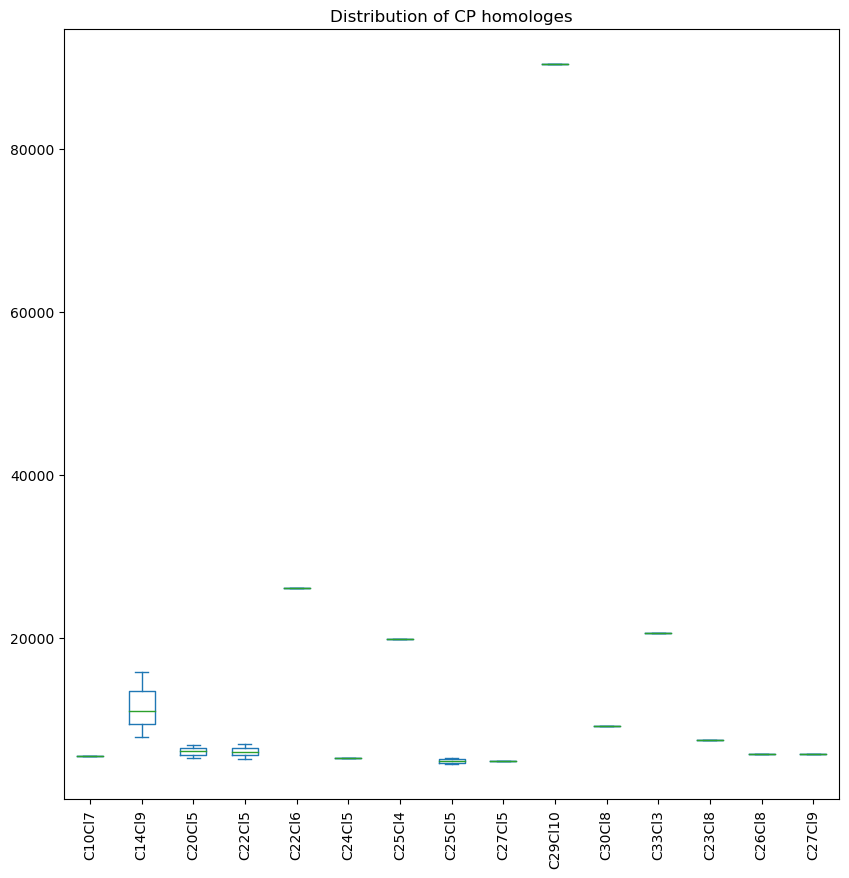

In [18]:
# quick visualization of results

pd.concat(extracted_intensities)[pd.concat(extracted_scores) > THRESHOLD].dropna(how = 'all').T\
.plot(kind = 'box', figsize = (10,10),rot=90, title = 'Distribution of CP homologes')